# Telco Churn Prediction - 84% F1-Score - 83% Recall

Performed by: [Sougat Dey](#https://www.linkedin.com/in/sougatdey/)
## About Me

<div style="text-align: justify"> I'm Sougat Dey, a Data Science enthusiast with expertise in Python and Statistics. This Churn Prediction project is my third dive into Machine Learning, focusing on customer retention strategies. Through data-driven insights and predictive modeling, I aim to showcase my skills in deriving actionable strategies for maximizing customer retention and driving business success. Join me as we navigate the world of Churn Prediction and strategic data analysis. </div>

div>

#### Connect on <a href = "https://www.linkedin.com/in/sougatdey/"> LinkedIn </a>.

## Introduction
In today's competitive business landscape, customer retention is paramount across industries. Churn, the rate at which customers stop doing business, significantly impacts a company's bottom line. Focusing on retaining customers is crucial for several reasons:

- **Cost Consideration:** Acquiring new customers is often more expensive than retaining existing ones (up to five times more). Minimizing churn leads to significant cost savings.
- **Revenue Stability:** Retained customers contribute to ongoing revenue streams and can be more profitable over time. Reducing churn rates achieves revenue stability and sustainable growth.
- **Brand Loyalty and Advocacy:** Loyal customers advocate for a brand, refer others, and provide valuable feedback. Strong customer relationships lead to long-term brand loyalty and positive word-of-mouth, invaluable assets in today's interconnected world.

Given these challenges and opportunities, our project focuses on Churn Prediction to help businesses proactively identify and retain at-risk customers. By leveraging machine learning algorithms and predictive analytics, we aim to develop a robust model that prioritizes recall, aligning with the strategic goal of maximizing customer retention and ensuring long-term business success.

![Credit: AnalyticsVidhya](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/Churn-Prediction-scaled.jpg)

## Project Process

1. **Exhaustive EDA and Baseline Model**:
   - Conducted exhaustive exploratory data analysis (EDA) to understand dataset characteristics.
   - Built a baseline Logistic Model as the initial predictive model but observed poor results, indicating the need for further improvements.

2. **Addressing Imbalanced Target**:
   - Identified the issue of an imbalanced target variable, which can lead to biased model predictions.
   - Implemented the Synthetic Minority Over-sampling Technique (SMOTE) for oversampling to balance the target variable classes and improve model performance.

3. **Model Building and Selection**:
   - Developed three machine learning models: Support Vector Classifier (SVC), RandomForestClassifier, and XGBoostClassifier.
   - Evaluated models based on performance metrics like recall, ROC-AUC score, and F1-score.
   - Chose the Support Vector Classifier (SVC) as the final model due to its highest recall, while maintaining comparable ROC-AUC score and F1-score with the ther models.
d F1-score.


**Note:** Dataset description can be found <a href = 'https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113'> here </a>.

## 1.0. Import Dependencies

In [1]:
## operational packages
import numpy as np
import pandas as pd

## displaying a maximum of 100 columns
pd.set_option("display.max_columns", 100)

## data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

## data preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

## model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

## ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## oversampling
from imblearn.over_sampling import SMOTE

## metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, classification_report, f1_score

## others
import warnings
warnings.filterwarnings("ignore")

## 2.0. Loading dataset

In [2]:
%%time
telco = pd.read_excel(r"C:\Users\souga\OneDrive - summer\Projects\Ongoing\Telco Churn Prediction\Telco_customer_churn.xlsx")

CPU times: total: 3.94 s
Wall time: 4.09 s


## 3.0. Initial Dataset Exploration

In [3]:
## fetching the head of the dataframe
telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
## fetching the summary of the dataframe
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

**Note:** Data type for `Total Charges` is set to object. It should be converted to float64.

In [5]:
## checking for inconsistent data entries
for column in telco.columns:
    print(f"{column}: {pd.api.types.infer_dtype(telco[column])}")

CustomerID: string
Count: integer
Country: string
State: string
City: string
Zip Code: integer
Lat Long: string
Latitude: floating
Longitude: floating
Gender: string
Senior Citizen: string
Partner: string
Dependents: string
Tenure Months: integer
Phone Service: string
Multiple Lines: string
Internet Service: string
Online Security: string
Online Backup: string
Device Protection: string
Tech Support: string
Streaming TV: string
Streaming Movies: string
Contract: string
Paperless Billing: string
Payment Method: string
Monthly Charges: floating
Total Charges: mixed-integer
Churn Label: string
Churn Value: integer
Churn Score: integer
CLTV: integer
Churn Reason: string


**Note:** We can see `Total Charges` has **mixed-integer** as inferred data type. We'll inspect what caused it as well as convert `Total Charges` to `float64` for further analysis in the later part of the notebook.

In [6]:
## fetching duplicated rows (as a whole) in the dataframe
telco.duplicated().sum()

0

In [7]:
## fetching duplicated rows (for CustomerID as a subset) in the dataframe
telco.duplicated(subset=['CustomerID']).sum()

0

In [8]:
## fetching columns which has at least 1 NULL value
telco.isnull().sum()[telco.isnull().sum() > 0]

Churn Reason    5174
dtype: int64

**Note:** Only `Churn Reason` has lots of `NULL` values. 

Two possible reasons could be:
1. Customer who remained with the business **MUST NOT** have an entry for the `Churn Reason`.
2. It might be possible that for a few Customer who actually `LEFT` and didn't specify the reason for leaving.

#### We'll check the same when we'll deal with the `NULL` values.

In [9]:
## fetching the total number of Churn and Non-Churn Customers
telco['Churn Value'].value_counts(normalize = True)*100

Churn Value
0    73.463013
1    26.536987
Name: proportion, dtype: float64

**Note:** Although the dataset is imbalanced, it's not a huge deal as the ratio is almost 3:1. We can perform oversampling to overcome the class imbalance and get a better shot at predicting the churn possibility better.

## 4.0. Data Preparation

**Premise:** From the metadata, it's clearly understood that `Count` doesn't serve anything to our analysis. Also, the `Lat Long` column is redundant since there are already two separate columns `Latitude` and `Longitude` bearing the same values but in different columns as opposed to a comma-separated format. Also, the same with `Churn Label` and `Churn Value`.

**Action:** Hence, we'll drop these three columns (`Count`, `Lat Long`, & `Churn Label`) and rename `Churn Value` to just `Churn` (1 = Churned, 0 = Remained).

In [10]:
## dropping the aforementioned columns
telco.drop(['Count', 'Lat Long', 'Churn Label'], axis = 1, inplace = True)

In [11]:
## renaming the Churn column
telco.rename({'Churn Value': 'Churn'}, axis = 1, inplace = True)

In [12]:
## rearranging the dataframe
telco = telco[['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'CLTV', 'Churn Reason', 'Churn Score', 'Churn']]

In [13]:
## featching the head of the dataframe
telco.head()

,CustomerID,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Score,Churn
0,3668-QPYBK,United States,California,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239,Competitor made better offer,86,1
1,9237-HQITU,United States,California,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701,Moved,67,1
2,9305-CDSKC,United States,California,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,5372,Moved,86,1
3,7892-POOKP,United States,California,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,5003,Moved,84,1
4,0280-XJGEX,United States,California,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,5340,Competitor had better devices,89,1


### 4.1. Dealing with `NULL` values

In [14]:
## fetching number of NULL value distribution over Churn and Non-Churn customers
telco[telco['Churn Reason'].isnull()]['Churn'].value_counts()

Churn
0    5174
Name: count, dtype: int64

**Insight:** It looks like we have `NULL` values for only churned customers. Hence, it's easier to imput. We'll simply put `Remained` as a value for filling `NULL` values in `Churn Reason`.

In [15]:
## imputing NULL values in the Churn Reason column
telco["Churn Reason"] = telco["Churn Reason"].fillna("Remained")

In [16]:
## making sure there are no NULL values left
telco.isnull().sum()[telco.isnull().sum() > 0]

Series([], dtype: int64)

### 4.2. Dealing with `Total Charges`

In [17]:
## checking the data type of first entry for `Total Charges`
type(telco['Total Charges'].iloc[0])

float

**Note:** Since the inferred data type is `mixed-integer`, the original data type is `object` and one of the entries is `float64`, we'll have to look for entries that are `string` in the column.

In [18]:
## fetching rows which have strings in `Total Charges`
telco[telco['Total Charges'].apply(lambda x: type(x) == str)]

,CustomerID,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Score,Churn
2234,4472-LVYGI,United States,California,San Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,2578,Remained,36,0
2438,3115-CZMZD,United States,California,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,5504,Remained,68,0
2568,5709-LVOEQ,United States,California,San Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,2048,Remained,45,0
2667,4367-NUYAO,United States,California,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,4950,Remained,48,0
2856,1371-DWPAZ,United States,California,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,4740,Remained,30,0
4331,7644-OMVMY,United States,California,Los Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,2019,Remained,53,0
4687,3213-VVOLG,United States,California,Sun City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,2299,Remained,49,0
5104,2520-SGTTA,United States,California,Ben Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,3763,Remained,27,0
5719,2923-ARZLG,United States,California,La Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,4890,Remained,69,0
6772,4075-WKNIU,United States,California,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,2342,Remained,44,0


In [19]:
## fetching rows with dtype = string for `Total Charges` column
telco[telco['Total Charges'].apply(lambda x: type(x) == str)].shape

(11, 30)

**Note:** There are 11 rows where `Total Charges` have blank strings. We'll consider this to be missing values and impute these with KNNImputer in the later part of the notebook.

## 5.0. Exploratory Data Analysis

Note: From here on, we'll start exploring the data from a univariate and multivariate perspective.

### 5.1. Analyizing Customer Base - by Geography

In [20]:
print(f"Number of unique customers: {telco['CustomerID'].nunique()}")

Number of unique customers: 7043


In [21]:
## plotting a scatterplot on map of customers based on their locations
fig = px.scatter_mapbox(telco, lat="Latitude", lon="Longitude", hover_name="CustomerID",
                        hover_data=["Country", "State", "City", "Zip Code", "Churn"],
                        color="Churn",
                        color_discrete_map={1: "red", 0: "green"},
                        zoom=4.2, height=300)

## customizing the map style
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

## adding custom marker styling
fig.update_traces(marker=dict(size=10, opacity=0.8))

## updating hover label styling
fig.update_traces(hoverlabel=dict(bgcolor='white', bordercolor='black', font=dict(size=12)))

## adding title and axis labels
fig.update_layout(title="Customer Locations by Churn",
                  xaxis_title="Longitude",
                  yaxis_title="Latitude",
                  font=dict(family="Arial", size=14, color="white"))

## showing the label
fig.show()

In [22]:
## which countries does the telecom company have services in?
telco['Country'].value_counts()

Country
United States    7043
Name: count, dtype: int64

In [23]:
## which state does the telecom company have services in?
telco['State'].value_counts()

State
California    7043
Name: count, dtype: int64

In [24]:
## which state does the telecom company have services in?
telco['City'].value_counts()

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

**Note:** Since each row has unique `CustomerID`, `value_counts()` returns the number of customer for each entity.

In [25]:
## How many zip codes does the telecom company serve?
telco['Zip Code'].nunique()

1652

In [26]:
## fetching #customers by zipcodes for each city
telco.groupby(['City', 'Zip Code'], as_index = False).agg({'CustomerID': 'nunique'}).rename({'CustomerID': '#Customers'}, axis = 1).sort_values('#Customers', ascending = False)

,City,Zip Code,#Customers
478,Glendale,91202,5
288,Covina,91723,5
322,Desert Hot Springs,92240,5
321,Desert Center,92239,5
320,Descanso,91916,5
...,...,...,...
594,Jackson,95642,4
593,Ivanhoe,93235,4
592,Isleton,95641,4
591,Irvine,92620,4


In [27]:
## fetching number of customers by zip code for each city -> fetching possible number of customers
telco.groupby(['City', 'Zip Code'], as_index = False).agg({'CustomerID': 'count'}).rename({'CustomerID': '#Customers'}, axis = 1).sort_values('#Customers', ascending = False)['#Customers'].unique()

array([5, 4], dtype=int64)

In [28]:
## creating a new dataframe by grouping by `City` to fetch the number of Customers, Zip Codes served, number of Churner
telco_grouped = telco.groupby("City", as_index = False).agg({'CustomerID': 'nunique', 'Zip Code': 'nunique', "Churn": 'sum'}).rename({'CustomerID': '#Customers', 'Zip Code': "#ZipCodes", 'Churn': '#Churn'}, axis = 1).sort_values('#Customers', ascending = False)

## showing the latest dataframe
print(telco_grouped)

               City  #Customers  #ZipCodes  #Churn
562     Los Angeles         305         61      90
869       San Diego         150         30      50
878        San Jose         112         28      29
855      Sacramento         108         27      26
872   San Francisco         104         26      31
...             ...         ...        ...     ...
434            Hood           4          1       1
435           Hoopa           4          1       1
436         Hopland           4          1       1
437       Hornbrook           4          1       1
1128          Zenia           4          1       1

[1129 rows x 4 columns]


In [29]:
## plotting the number of customer, zip codes served and churn customers for the top 20 cities
telco_grouped = telco_grouped.head(20)

## plotting using Plotly Express
fig = go.Figure()

## adding the bars for each category
fig.add_trace(go.Bar(x=telco_grouped['City'], y=telco_grouped['#Customers'], name='#Customers', marker_color='#FF6347'))
fig.add_trace(go.Bar(x=telco_grouped['City'], y=telco_grouped['#ZipCodes'], name='#ZipCodes', marker_color='#FFA07A'))
fig.add_trace(go.Bar(x=telco_grouped['City'], y=telco_grouped['#Churn'], name='#Churn', marker_color='#1f77b4'))

## updating layout
fig.update_layout(barmode='group', title='Customer base by Top 20 Cities',
                  xaxis_title='City',
                  font=dict(family="Arial", size=14, color="white"),
                  xaxis=dict(tickfont=dict(color='white')),
                  yaxis=dict(tickfont=dict(color='white')),
                  plot_bgcolor='black', paper_bgcolor='black',
                  hoverlabel=dict(bgcolor='white', font=dict(color='black')), height = 500)

## showing the plot
fig.show()

In [30]:
## fetching countries where the company didn't lose any of its existing customers
no_churn_cities = telco[~telco.City.isin(telco[telco['Churn'] == 1]['City'].unique())].groupby('City', as_index=False).agg({'CustomerID': 'nunique', 'Zip Code': 'nunique'}).rename({'CustomerID': '#Customers', 'Zip Code': '#ZipCodes'}, axis = 1)

In [31]:
## fetching the descriptive stats for no_churn_cities
no_churn_cities.select_dtypes(exclude = 'object').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#Customers,296.0,4.253378,0.827487,4.0,4.0,4.0,4.0,12.0
#ZipCodes,296.0,1.027027,0.182114,1.0,1.0,1.0,1.0,3.0


In [32]:
## fetching total number of customers in those cities
no_churn_cities['#Customers'].sum()

1259

In [33]:
## fetching total number of zip codes served in those cities
no_churn_cities['#ZipCodes'].sum()

304

**Key Findings:**
1. The company serves particularly in **California, United States**.
2. It serves in 1129 cities across 1652 zip codes.
3. It has its most customers in **Los Angeles**.
4. Even though the company covers more than 300 zip codes in **Los Angeles**, per zip code #Customer is almost same like any other city.
5. In 296 cities, the company didn't lose any of its customers.
6. Total 1259 customers remained with the business in those 296 cities.
7. Cities where the company didn't lose any customer, it serves in a total of 304 zip codes.

### 5.2. Analyzing Customer Base - by Customer Characteristics

In [34]:
## fetching customers by gender
telco.groupby(['Gender', 'Churn']).agg({'CustomerID': 'nunique'}).rename({'CustomerID': '#Customers'}, axis = 1)

#Customers
Gender Churn            
Female 0            2549
       1             939
Male   0            2625
       1             930

In [35]:
## fetching customers by `Senior Citizen`
telco.groupby(['Senior Citizen', 'Churn']).agg({'CustomerID': 'nunique'}).rename({'CustomerID': '#Customers'}, axis = 1)

#Customers
Senior Citizen Churn            
No             0            4508
               1            1393
Yes            0             666
               1             476

In [36]:
## fetching customers by `Partner`
telco.groupby(['Partner', 'Churn']).agg({'CustomerID': 'nunique'}).rename({'CustomerID': '#Customers'}, axis = 1)

#Customers
Partner Churn            
No      0            2441
        1            1200
Yes     0            2733
        1             669

In [37]:
## fetching customers by `Dependents`
telco.groupby(['Dependents', 'Churn']).agg({'CustomerID': 'nunique'}).rename({'CustomerID': '#Customers'}, axis = 1)

#Customers
Dependents Churn            
No         0            3653
           1            1763
Yes        0            1521
           1             106

In [38]:
## fetching customer type who are most likely to churn
print(telco.groupby(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Churn'], as_index = False).agg({'CustomerID': 'count'}).rename({'CustomerID': '#Customers'}, axis = 1).query("Churn == 1").sort_values('#Customers', ascending = False).drop('Churn', axis=1).reset_index(drop=True))

    Gender Senior Citizen Partner Dependents  #Customers
0   Female             No      No         No         439
1     Male             No      No         No         438
2     Male             No     Yes         No         213
3   Female             No     Yes         No         209
4   Female            Yes      No         No         155
5     Male            Yes      No         No         118
6     Male            Yes     Yes         No         115
7   Female            Yes     Yes         No          76
8   Female             No     Yes        Yes          29
9     Male             No      No        Yes          23
10  Female             No      No        Yes          22
11    Male             No     Yes        Yes          20
12  Female            Yes     Yes        Yes           5
13  Female            Yes      No        Yes           4
14    Male            Yes     Yes        Yes           2
15    Male            Yes      No        Yes           1


#### Insight: Single dependent-free adults (both male and female) are most likely to churn.

### 5.3. Analyzing Customer base - by Services

#### 5.3.1. Phone Service

In [39]:
## fetching customers by phone service
telco.groupby(['Phone Service', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Phone Service Churn            
No            0             512
              1             170
Yes           0            4662
              1            1699

In [40]:
## fetching customers by multiple lines
telco.groupby(['Multiple Lines', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Multiple Lines   Churn            
No               0            2541
                 1             849
No phone service 0             512
                 1             170
Yes              0            2121
                 1             850

In [41]:
## fetching churn customers by phone service related predictors
telco.groupby(['Phone Service', 'Multiple Lines', 'Churn'], as_index = False).agg({'CustomerID': 'nunique'}).rename({"CustomerID": "#Customers"}, axis = 1)

,Phone Service,Multiple Lines,Churn,#Customers
0,No,No phone service,0,512
1,No,No phone service,1,170
2,Yes,No,0,2541
3,Yes,No,1,849
4,Yes,Yes,0,2121
5,Yes,Yes,1,850


**Key Findings:**
1. Most customers do not sign up for `Multiple Lines`.
2. Customers with or without `Multiple Lines` are equally prone to almost churn.

#### 5.3.2. Internet Service

In [42]:
## fetching customers by Internet Service
telco.groupby(['Internet Service', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Internet Service Churn            
DSL              0            1962
                 1             459
Fiber optic      0            1799
                 1            1297
No               0            1413
                 1             113

**Insight:** Customers who signed up for 'Fiber optic' `Internet Service` have churned to a large extent.

In [43]:
## fetching customers by Online Security
telco.groupby(['Online Security', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Online Security     Churn            
No                  0            2037
                    1            1461
No internet service 0            1413
                    1             113
Yes                 0            1724
                    1             295

In [44]:
## fetching customers by Online Backup
telco.groupby(['Online Backup', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Online Backup       Churn            
No                  0            1855
                    1            1233
No internet service 0            1413
                    1             113
Yes                 0            1906
                    1             523

In [45]:
## fetching customers by Device Protection
telco.groupby(['Device Protection', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Device Protection   Churn            
No                  0            1884
                    1            1211
No internet service 0            1413
                    1             113
Yes                 0            1877
                    1             545

In [46]:
## fetching customers by Tech Support
telco.groupby(['Tech Support', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Tech Support        Churn            
No                  0            2027
                    1            1446
No internet service 0            1413
                    1             113
Yes                 0            1734
                    1             310

In [47]:
## fetching top 10 rows attributing to churn customers by internet service related predictors
telco.groupby(['Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Churn'], as_index = False).agg({'CustomerID': 'nunique'}).rename({"CustomerID": "#Customers"}, axis = 1).query('Churn == 1').sort_values('#Customers', ascending = False).head(10).reset_index(drop=True).drop('Churn', axis=1)

,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,#Customers
0,Fiber optic,No,No,No,No,539
1,DSL,No,No,No,No,179
2,Fiber optic,No,No,Yes,No,159
3,Fiber optic,No,Yes,No,No,157
4,Fiber optic,No,Yes,Yes,No,116
5,No,No internet service,No internet service,No internet service,No internet service,113
6,Fiber optic,Yes,No,No,No,58
7,DSL,No,No,Yes,No,48
8,Fiber optic,No,No,Yes,Yes,43
9,Fiber optic,No,No,No,Yes,42


**Key Findings:**
1. People with "Fiber Optic" `Internet Service` are most likely to churn which may cause due to a poor connection. The company should consider look into this for further analysis.
2. Customers who signed up for `Online Security` has a lower churn-rate.
3. More than 50% of the Customers with "No" `Tech Support` churned.

In [48]:
## fetching customers by Streaming TV
telco.groupby(['Streaming TV', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Streaming TV        Churn            
No                  0            1868
                    1             942
No internet service 0            1413
                    1             113
Yes                 0            1893
                    1             814

In [49]:
## fetching customers by Streaming Movies
telco.groupby(['Streaming Movies', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Streaming Movies    Churn            
No                  0            1847
                    1             938
No internet service 0            1413
                    1             113
Yes                 0            1914
                    1             818

In [50]:
## fetching top 10 rows attributing to churn customers by streaming service related predictors
telco.groupby(['Streaming TV', 'Streaming Movies', 'Churn'], as_index = False).agg({'CustomerID': 'nunique'}).rename({"CustomerID": "#Customers"}, axis = 1).drop('Churn', axis=1)

,Streaming TV,Streaming Movies,#Customers
0,No,No,1323
1,No,No,695
2,No,Yes,545
3,No,Yes,247
4,No internet service,No internet service,1413
5,No internet service,No internet service,113
6,Yes,No,524
7,Yes,No,243
8,Yes,Yes,1369
9,Yes,Yes,571


**Insight:** Both `Streaming TV` and `Streaming Movies` are not good predictors, as in both cases churn and non-churn customer ratio is almost similar.

#### 5.3.4. Billing & Contracts

In [51]:
## fetching customers by `Tenure Months`
telco.groupby(['Tenure Months', 'Churn']).agg({'CustomerID': 'count'}).rename({'CustomerID': '#Customers'}, axis = 1).transpose()

Tenure Months  0    1         2         3       4       5       6       7   \
Churn           0    0    1    0    1    0   1   0   1   0   1   0   1   0   
#Customers     11  233  380  115  123  106  94  93  83  69  64  70  40  80   

Tenure Months      8       9       10      11      12      13      14      15  \
Churn           1   0   1   0   1   0   1   0   1   0   1   0   1   0   1   0   
#Customers     51  81  42  73  46  71  45  68  31  79  38  71  38  52  24  62   

Tenure Months      16      17      18      19      20      21      22      23  \
Churn           1   0   1   0   1   0   1   0   1   0   1   0   1   0   1   0   
#Customers     37  52  28  61  26  73  24  54  19  53  18  46  17  63  27  72   

Tenure Months      24      25  ...  48     49      50      51     52     53  \
Churn           1   0   1   0  ...   0  1   0   1   0   1   0  1   0  1   0   
#Customers     13  71  23  56  ...  55  9  51  15  58  10  60  8  72  8  56   

Tenure Months      54      55     56      57     58      59     60     61     \
Churn           1   0   1   0  1   0   1   0  1   0   1   0  1   0  1   0  1   
#Customers     14  55  13  55  9  70  10  57  8  56  11  52  8  70  6  68  8   

Tenure Months  62     63     64     65     66      67      68     69      70  \
Churn           0  1   0  1   0  1   0  1   0   1   0   1   0  1   0  1    0   
#Customers     65  5  68  4  76  4  67  9  76  13  88  10  91  9  87  8  108   

Tenure Months       71      72     
Churn           1    0  1    0  1  
#Customers     11  164  6  356  6  

[1 rows x 145 columns]

**Insight:** No wonder customers who signed up for a longer tenure are less likely to churn.

In [52]:
## fetching customers by Contract type
telco.groupby(['Contract', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Contract       Churn            
Month-to-month 0            2220
               1            1655
One year       0            1307
               1             166
Two year       0            1647
               1              48

In [53]:
## fetching customers by Billing type
telco.groupby(['Paperless Billing', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Paperless Billing Churn            
No                0            2403
                  1             469
Yes               0            2771
                  1            1400

In [54]:
## fetching customers by Payment type
telco.groupby(['Payment Method', 'Churn']).agg({'CustomerID': 'nunique'})

CustomerID
Payment Method            Churn            
Bank transfer (automatic) 0            1286
                          1             258
Credit card (automatic)   0            1290
                          1             232
Electronic check          0            1294
                          1            1071
Mailed check              0            1304
                          1             308

**Key Findings:** 
1. Most customers sign up for a "Month-to-Month" `Contract` type.
2. Customers who sign-up for a "Month-to-Month" `Contract` type is most likely to churn.
3. Customers with "Two year" `Contract` types churn a significantly less.
4. Almost 33% of all customers opting for `Paperless Billing` end up churning.
5. Almost 45% of all customers opting for "Electronic check" `Payment Method` end up churning.

In [55]:
## fetching the mean of the Monthly Charges & Total charges for churn and non-churn customers
telco[~telco['Total Charges'].apply(lambda x: type(x)==str)].groupby('Churn').agg({'Monthly Charges': 'mean',
                                                                                  'Total Charges': 'mean'})

,Monthly Charges,Total Charges
Churn,,
0,61.307408,2555.344141
1,74.441332,1531.796094


**Note:** Since `Total Charge` column has a few rows with blank strings, we had to filter the dataframe before applying groupby.

In [56]:
# creating a box plot of the distributions for Total Charges`
fig = px.box(telco, x='Monthly Charges', y='Churn', color='Churn', orientation='h', title='Churn Customers - Monthly Charges')
fig.update_traces(marker=dict(size=10))
fig.show()

# creating a box plot of the distributions for `Total Charges`
fig = px.box(telco, x='Total Charges', y='Churn', color='Churn', orientation='h', title='Churn Customers - Total Charges')
fig.update_traces(marker=dict(size=10))
fig.show()

In [57]:
## fetching the mean of Customer Lifetime Value of churn and non-churn customers
telco.groupby('Churn').agg({'CLTV': 'mean'})

,CLTV
Churn,
0,4490.921337
1,4149.414660


In [58]:
## creating box plot for CLTV
fig = px.box(telco, x='CLTV', y='Churn', color='Churn', orientation='h', title='Churn Customers - CLTV')
fig.update_traces(marker=dict(size=10))
fig.show()

In [59]:
## fetching churn customers by churn reasons
print(telco[telco['Churn Reason'] != "Remained"]['Churn Reason'].value_counts())

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [60]:
## fetching descriptive stats for `Tenure Months`, `Monthly Charges`, `CLTV` and `Churn Score`
telco.drop(['Zip Code', 'Latitude', 'Longitude', 'Total Charges', 'Churn'], axis = 1).select_dtypes(exclude = 'object').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure Months,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
Monthly Charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
CLTV,7043.0,4400.295755,1183.057152,2003.00,3469.0,4527.00,5380.50,6500.00
Churn Score,7043.0,58.699418,21.525131,5.00,40.0,61.00,75.00,100.00


**Note:** We had to exclude `Total Charges` as the column needs to processed.

In [61]:
## dropping column containing geographical data and 'Churn Reason'
telco = telco.drop(['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Reason', 'Churn Score'], axis=1)

**Note:** 
 - Training a machine learning model on customers' geographical data can be unethical due to privacy concerns and the potential for misuse of sensitive information. This practice can lead to unauthorized tracking, profiling, and discrimination against individuals based on their location data. That's why we removed geographical data from the dataframe to prepare it for modelling.
 - Also, removing `Churn Reason` & `Churn Score` is crucial to prevent data leakage otherwise the model would focus more on these two column instead of learning the actual underlying pattern for causing to churn.

In [62]:
## replacing blank strings with NULL in `Total Charges`
telco['Total Charges'] = telco['Total Charges'].apply(lambda x: np.nan if type(x) == str else x)

In [63]:
## creating a dataframe for correlation
correlation_matrix = pd.get_dummies(telco.dropna(), dtype=int, drop_first=True).corr()

## plotting the heatmap using Plotly
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='icefire')

fig.update_layout(title="Correlation Heatmap",
                  width=1000,
                  height=800)

fig.show()

### 5.4.0. Model Preparation & Dealing with `Total Charges`

#### 5.4.1. `NULL` Imputation in `Total Charges` columns

In [64]:
## creating an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [65]:
## setting X and y for training
X = pd.get_dummies(telco, dtype=int, drop_first=True) ## we will drop `Churn` after imputing NULL values
y = telco['Churn']

In [66]:
## confirming NULL values in `Total Charges`
X['Total Charges'].isna().sum()

11

In [67]:
## imputing NULL values in `Total Charges`
## creating a dataframe
## assigning it back to X
X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)

In [68]:
## confirming there are no NULL values left in `Total Charges`
X['Total Charges'].isna().sum()

0

In [69]:
## lastly, dropping `Churn` column
X = X.drop(['Churn'], axis = 1)

#### 5.4.2. Model Preparation - Train, Validation & Test Split

**Note:** We'll split the dataset into three sets - train, validation & test. We'll train our models on the training data and evaluate performance on the validation data for further hyperparameter tuning. Lastly, we'll use the test data to report the final model's performance and won't perform any hyperparameter tuning to ensure the robustness of the model and prevent data leakage.

In [70]:
## splitting the dataset into training, validating and testing

## training and holdout
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## validation and test
X_validate, X_test, y_validate, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, stratify=y_holdout, random_state=101)

In [71]:
print("Training")
print("---------")
print(f"X_train = {X_train.shape} <-> y_train = {y_train.shape}")
print("------------------------------------------")
print("validation")
print("---------")
print(f"Validating: X_validate = {X_validate.shape} <-> y_validate = {y_validate.shape}")
print("----------------------------------------------------------")
print("Testing")
print("---------")
print(f"Test: X_test = {X_test.shape} <-> y_test = {y_test.shape}")


Training
---------
X_train = (5634, 31) <-> y_train = (5634,)
------------------------------------------
validation
---------
Validating: X_validate = (704, 31) <-> y_validate = (704,)
----------------------------------------------------------
Testing
---------
Test: X_test = (705, 31) <-> y_test = (705,)


## 6.0. Model Building

**Note:** We'll start off by building a baseline Logistic Regression Model to get a preliminary understanding of the expected results and then we'll move towards oversampling and eventually building more complex ensemble models.

### 6.1. Baseline Model - LogisticRegression

In [72]:
## defining a function to print classification report and plot the confusion matrix
def modelPerformance(model, test, result):
    y_pred = model.predict(test)
    print(classification_report(result, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(result, y_pred), display_labels = ['Remained', 'Churned'])
    disp.plot(cmap='inferno');

In [73]:
## creating an object of LogisticRegression
logit_model = LogisticRegression(max_iter=10000, random_state=101)

In [74]:
## fiting the model
logit_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=101)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       517
           1       0.63      0.52      0.57       187

    accuracy                           0.79       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.78      0.79      0.78       704



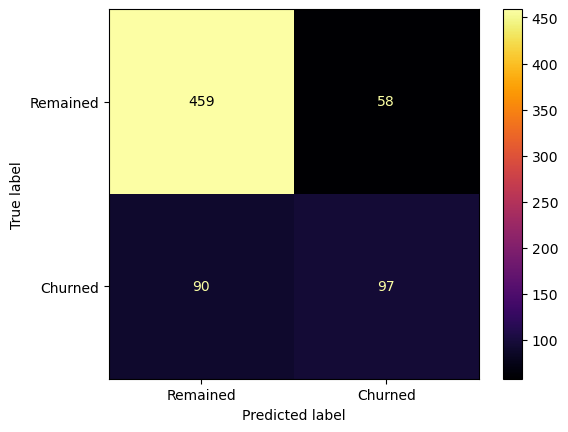

In [75]:
## fetching the model performance
modelPerformance(logit_model, X_validate, y_validate)

**Note:** 
A Recall score of justabout  52% for` pos_label = `1 suggests that the model is correctly identifying only about half of the positive cases (churn in this context). This means that a significant portion of customers who are actually at risk of churning are being missed by the model

Building a better model is crucial for maximizing retention, reducing acquisition costs, gaining a competitive edge, and making data-driven decisions. 

### 6.2. Oversampling - SMOTE

As we have previously discussed, the dataset is imbalanced. We can overcome this issue by undersampling or oversampling. Undersampling can lead to data loss, especially in situations where the minority class is already limited in size. When we undersample, we deliberately reduce the number of instances in the majority class to balance the class distribution. However, this reduction can result in the loss of potentially valuable information present in the majority class samples that are removed. Also, the dataset we're working on is fairly small, performing oversampling is a better approach.

That's why we'll use SMOTE(Synthetic Minority Oversampling Technique) by <a href = "https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html"> imblearn </a> to perform oversampling on the dataset.

In [76]:
## creating an instance of SMOTE
smote = SMOTE(k_neighbors=5, random_state=101)

In [77]:
## resampling the dataset using SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

In [78]:
## splitting the dataset into training, validating and testing

## training and holdout
X_train, X_holdout, y_train, y_holdout = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=101)

## validation and test
X_validate, X_test, y_validate, y_test = train_test_split(X_holdout, y_holdout, test_size=0.3, stratify=y_holdout, random_state=101)

In [79]:
print("Training")
print(f"X_train = {X_train.shape} <-> y_train = {y_train.shape}")
print("------------------------------------------")
print("validation")
print(f"Validating: X_validate = {X_validate.shape} <-> y_validate = {y_validate.shape}")
print("----------------------------------------------------------")
print("Testing")
print(f"Test: X_test = {X_test.shape} <-> y_test = {y_test.shape}")
print("---------------------------------------------")

Training
X_train = (8278, 31) <-> y_train = (8278,)
------------------------------------------
validation
Validating: X_validate = (1449, 31) <-> y_validate = (1449,)
----------------------------------------------------------
Testing
Test: X_test = (621, 31) <-> y_test = (621,)
---------------------------------------------


### 6.3. Scaling

**Note:** Scaling data is important before applying SVC because SVC is sensitive to feature magnitudes and can be biased if features have different scales. On the other hand, Random Forest and XGBoost are robust to feature scaling, so scaling data before using them is not necessary and won't harm model performance.

In [80]:
## creating an instance of StandardScaler
scaler = StandardScaler()

## scaling the training and validation set
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

### 6.4. SVC - Hyperparameter Selection - RandomSearchCV

In [81]:
## setting up the hyperparameters for SVC
paramsSVC = {
    'kernel': ['linear', 'rbf'], 
    'C': [0.1, 1, 10],
    'gamma': ['auto', 'scale']
}

In [82]:
## creating a RandomizedSearchCV object for SVC
randomSVC = RandomizedSearchCV(SVC(random_state=101, max_iter=-1, probability=True), paramsSVC, n_jobs=4, verbose=1, cv=5, scoring = 'f1', refit=True)

In [83]:
%%time
## training the SVC model
randomSVC.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 12.2 s
Wall time: 2min 50s


RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=101),
                   n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'rbf']},
                   scoring='f1', verbose=1)

In [84]:
## fetching the best-found hyperparameters
randomSVC.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}

In [85]:
## fetching the best estimator
randomSVC.best_estimator_

SVC(C=10, probability=True, random_state=101)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       725
           1       0.85      0.88      0.86       724

    accuracy                           0.86      1449
   macro avg       0.86      0.86      0.86      1449
weighted avg       0.86      0.86      0.86      1449



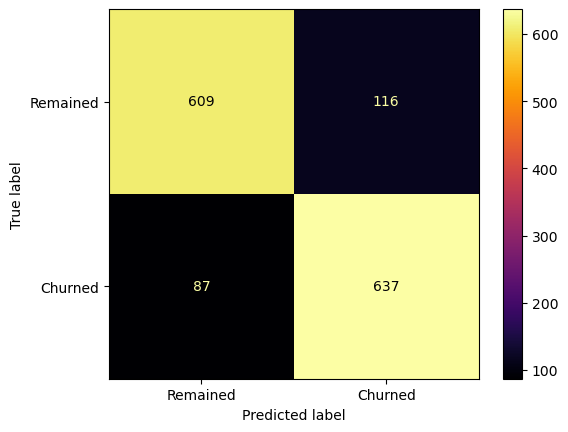

In [86]:
## checking the model performance on the validation set
modelPerformance(randomSVC, X_validate, y_validate)

### 6.5. RandomForestClassifier - Hyperparameter Selection - RandomizedSearchCV

In [87]:
## setting up the hyperparameters for RandomForestClassifier
paramsRF = {
    "n_estimators": np.linspace(64, 256, 10, dtype = int),
    "criterion": ['gini', 'log_loss'],
    "max_depth": [6, 8, None],
    "max_features": ['sqrt', 'log2', None]
}

In [88]:
## creating the RandomizedSearchCV object
randomRF = RandomizedSearchCV(RandomForestClassifier(random_state=101), paramsRF, n_jobs=4, verbose=2, cv=5, scoring='f1', refit=True)

In [89]:
%%time
## fiting the RandomizedSearchCV model to find the best parameters for Random Forest
randomRF.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 1.09 s
Wall time: 37 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
                   n_jobs=4,
                   param_distributions={'criterion': ['gini', 'log_loss'],
                                        'max_depth': [6, 8, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': array([ 64,  85, 106, 128, 149, 170, 192, 213, 234, 256])},
                   scoring='f1', verbose=2)

In [90]:
## fetching the best parameters four
randomRF.best_params_

{'n_estimators': 64,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'log_loss'}

In [91]:
## fetching the best estimator
randomRF.best_estimator_

RandomForestClassifier(criterion='log_loss', n_estimators=64, random_state=101)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       725
           1       0.88      0.86      0.87       724

    accuracy                           0.87      1449
   macro avg       0.87      0.87      0.87      1449
weighted avg       0.87      0.87      0.87      1449



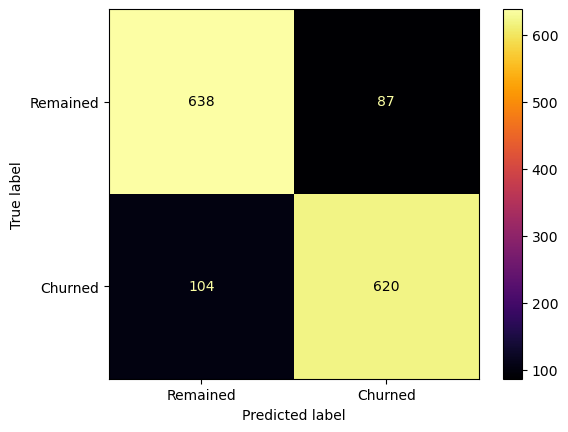

In [92]:
## evaluating the result on validation set
modelPerformance(randomRF, X_validate, y_validate)

In [93]:
## creating a barplot for feature importances
bar_color = '#FF6347'

fig = go.Figure(data=go.Bar(x=pd.Series(randomRF.best_estimator_.feature_importances_, index=X.columns).sort_values().index,
                             y=pd.Series(randomRF.best_estimator_.feature_importances_, index=X.columns).sort_values(),
                             marker_color=bar_color))

fig.update_layout(title='Feature Importance',
                  xaxis_title='Features',
                  yaxis_title='Importance')

fig.show()

### 6.6. XGBoostClassifier - Hyperparameter Selection - RandomizedSearchCV

In [94]:
## setting the hyperparameters for XGBoost 
paramsXG = {
    "n_estimators": np.linspace(64, 256, 10, dtype = int),
    "eta": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [6, 8, None],
    "subsample": [0.5, 0.8, 1.0]    
}

In [95]:
## creating the RandomizedSearchCV object for XGBoostClassifier
randomXGB = RandomizedSearchCV(XGBClassifier(seed=101, eval_metric='logloss', objective='binary:logistic'), paramsXG, n_jobs=4, verbose=1, cv=5, scoring='f1', refit=True)

In [96]:
%%time
## fiting the model
randomXGB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 3.05 s
Wall time: 15.5 s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=4,
                   param_distributions={'eta': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [6, 8, None],
                                        'n_estimators': array([ 64,  85, 106, 128, 149, 170, 192, 213, 234, 256]),
                                        'subsample': [0.5, 0.8, 1.0]},
                   scoring='f1', verbose=1)

In [97]:
## fetching the best hyperparameters for RandomForestClassifier
randomRF.best_params_

{'n_estimators': 64,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'log_loss'}

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       725
           1       0.86      0.86      0.86       724

    accuracy                           0.86      1449
   macro avg       0.86      0.86      0.86      1449
weighted avg       0.86      0.86      0.86      1449



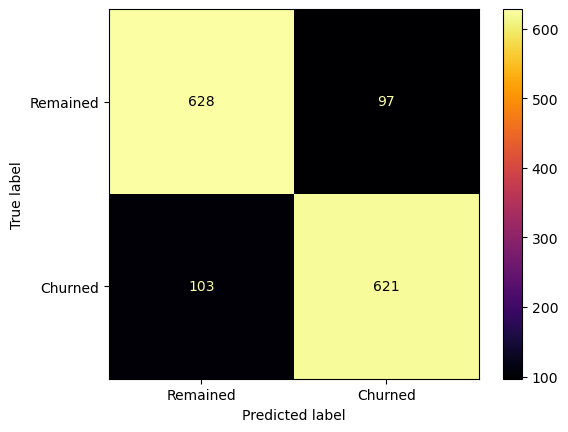

In [98]:
## fetching model performance
modelPerformance(randomXGB, X_validate, y_validate)

In [99]:
## creating a barplot for feature importances
bar_color = '#FF6347'

fig = go.Figure(data=go.Bar(x=pd.Series(randomXGB.best_estimator_.feature_importances_, index=X.columns).sort_values().index,
                             y=pd.Series(randomXGB.best_estimator_.feature_importances_, index=X.columns).sort_values(),
                             marker_color=bar_color))

fig.update_layout(title='Feature Importance',
                  xaxis_title='Features',
                  yaxis_title='Importance')

fig.show()

### 6.1. Model Evaluation

In [100]:
## creating a dictionary of currently built ML models
models = {'randomSVC': randomSVC, 'randomRF': randomRF, 'randomXGB': randomXGB}

In [101]:
## creating lists of metric scores for each ML model
accuracy_scores_list = [np.round(accuracy_score(y_validate,model.predict(X_validate)), 3) for model in models.values()]

recall_scores_list = [np.round(recall_score(y_validate,model.predict(X_validate)), 3) for model in models.values()]

precision_scores_list = [np.round(precision_score(y_validate,model.predict(X_validate)), 3) for model in models.values()]

f1_scores_list = [np.round(f1_score(y_validate,model.predict(X_validate)), 3) for model in models.values()]

In [102]:
## creating a dataframe to store model summary
model_summary = pd.DataFrame(data=np.array([accuracy_scores_list, recall_scores_list, precision_scores_list, f1_scores_list]).transpose(), columns=['Accuracy', 'Recall', 'Precision', 'F1'], index=['SVC', 'RandomForest', 'XGBoost']).sort_values(['Recall', 'F1'], ascending=False)

## fetching the newly created dataframe
print(model_summary)

              Accuracy  Recall  Precision     F1
SVC              0.860   0.880      0.846  0.863
XGBoost          0.862   0.858      0.865  0.861
RandomForest     0.868   0.856      0.877  0.867


In [103]:
## plotting the ROC curve alongwith roc-auc-score
fig = go.Figure()

for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_validate)[:, 1]
    fpr, tpr, _ = roc_curve(y_validate, y_pred_proba)
    roc_auc = roc_auc_score(y_validate, y_pred_proba)
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{model_name} (AUC={roc_auc:.3f})'))

fig.update_layout(title='ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  legend=dict(x=0, y=1, traceorder='normal', font=dict(family='sans-serif', size=12)),
                  autosize=False, width=800, height=600)
fig.show()

## 7.0. Final Model

#### Prioritizing Recall for Churn Prediction

In our decision-making process for Churn Prediction models, we prioritize recall due to the significant cost disparity between acquiring new customers and retaining existing ones. Here's why:

- **Cost Consideration**:
  - Acquiring new customers can cost up to five times more than retaining existing ones. Therefore, accurately identifying and targeting potential churners is crucial for cost-effective business strategies.

- **Importance of Recall**:
  - Recall measures our model's ability to correctly identify churn cases among all actual churners. This metric is particularly important because missing churn cases can lead to substantial revenue loss.

- **Balanced F1 Score**:
  - Although precision and ROC-AUC are essential metrics, it's noteworthy that almost each model we considered has the same F1 score. This indicates a good balance between precision (identifying true churners among predicted churners) and recall (capturing most actual churners).

- **Minor Differences in ROC-AUC**:
  - While there are slight differences in ROC-AUC scores among the models, these differences are not significant enough to outweigh the importance of maximizing recall, especially given the cost implications.

Therefore, considering the balanced F1 score and the minor differences in ROC-AUC, we believe choosing the Support Vector Classifier (SVC) model, which prioritizes recall, aligns well with our goal of effectively managing churn and retaining valuable customers.


In [104]:
## final SVC model with best-found parameters
final_model = SVC(C=10, gamma='scale', kernel='rbf', max_iter=-1, random_state=101)

In [105]:
%%time
## training the final model
final_model.fit(X_train, y_train)

CPU times: total: 2.67 s
Wall time: 2.28 s


SVC(C=10, random_state=101)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       310
           1       0.85      0.83      0.84       311

    accuracy                           0.84       621
   macro avg       0.84      0.84      0.84       621
weighted avg       0.84      0.84      0.84       621



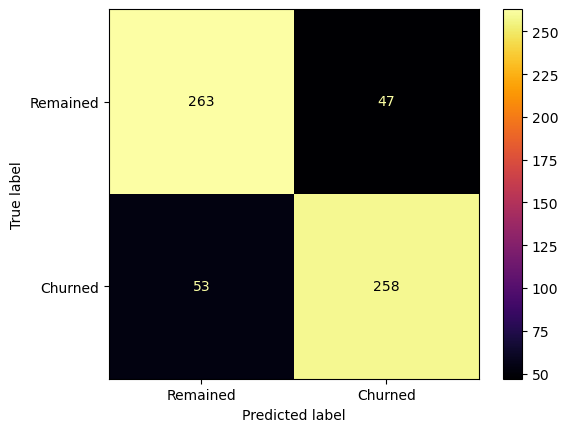

In [106]:
## reporting final performance metric
modelPerformance(randomSVC, X_test, y_test)

#### Final Metric Report:
1. Recall - 83%
2. F1-Score - 84%
3. Accuracy - 84%

## 8.0. Conclusion

In conclusion, our decision to prioritize recall in selecting the Support Vector Classifier (SVC) model for Churn Prediction is based on the significant cost difference between acquiring new customers and retaining existing ones. This choice aligns with our goal of effectively managing churn and maximizing customer retention, supported by a balanced F1 score and minor differences in ROC-AUC among the models considered.

In future iterations, we aim to build an even better model by incorporating additional features, optimizing hyperparameters, and exploring advanced techniques to further enhance our Churn Prediction capabilities.

### Thank you for making it this far. Cheers.